#차례
※ 데이터 로드 및 전처리  
1.1 데이터 확인 (head)  
1.2 특수 문자 포함 확인  

/fixme 박스플롯으로 시각화시 몇개의 변수들증 박스플롯이 나타나지 않는 문제가 있음.(로그변환 문제?)  
3. 데이터가 정규분포를 따르는지 (박스플롯으로)    
   └ 부호화 로그변환 후 박스플롯 재확인  

4. 결측치 개수, 비율 확인  
   └ 결측 비율 높은 열에 대해 다른 열로 대체 가능한지 확인 (산점도) → 불가능    
   └ 모든 결측치 MICE로 대체  

5. 종속변수 분포 확인  
   └ 희소 데이터 처리법 (1등급 삭제)  

※ 다중공선성 제거 (1차 변수 선정)  
- 히트맵, 막대그래프, VIF

※ 로지스틱 회귀분석(OLS) (2차 변수 선정)  

※ 랜덤 포레스트  
test_size = 0.1~ 0.3 (0.05 간격)  
- test사이즈 0.1  
- test사이즈 0.15  
- test사이즈 0.2  
- test사이즈 0.25  
- test사이즈 0.3  
n_estimators   
- 100  
- 150  
- 200  


1. 불러오기 / 특수문자 확인
2. 박스플롯 1차 확인
3. 결측치 확인
4. 결측치 대체 (MICE)
5 부호화 로그 변환
6. 박스플롯 2차 확인
7. 종속변수 분포 확인 / 희소데이터 처리


구글드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


이미지 한글 인식을 위한 조치




In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117072 files and direct

# 불러오기 / 특수문자 확인


In [ ]:
#데이터 로드 및 전처리 분석에 필요한 라이브러리를 모두 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor


data = pd.read_excel("/content/drive/MyDrive/25-2 금융빅데이터/chapter 06/금융데이터셋(Kospi)__673(version 2).xls", sheet_name="금융데이터셋(673)")

## 2. 전체 셀에 숫자 이외의 특수 문자(, \ +) 포함 여부 확인 및 마이너스 부호 꺠지는 형상 방지처리
# 마이너스 부호가 깨지는 현상을 방지합니다.
# 나눔고딕 폰트를 사용하도록 설정.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
print("- 분석 환경 설정 완료")



# 최초 5개 행을 확인: 어떤 열이 있고, 데이터 타입이 무엇인지 목측
display(data.head(3))
print(f"전체 행, 열: {data.shape[0], data.shape[1]}\n\n")

# 원본 데이터를 복사하여 분석용 데이터프레임 'df'를 생성합니다.
# 원본 'data'는 보존하고, 모든 처리는 'df'에서 이루어집니다.
df = data.copy()
print("##원본 데이터 로딩 및 복사 완료")
print(f"원본 데이터 크기: {df.shape}\n\n")


# 각 열 별 데이터 수, 데이터 타입 확인
print("##열 별 데이터 수, 데이터 타입 확인")
data.info()

ModuleNotFoundError: No module named 'statsmodels'


## 전체 셀에 숫자 이외의 특수 문자(, \ +) 포함 여부 확인  


In [ ]:
data.astype(str).apply(lambda col: col.str.contains(r'[,\\+]', regex=True).sum())

,0
KIS,0
Name,0
"신용등급(우량,불량)",0
KIS 신용평점/0A3010,0
유동비율/X1,0
당좌비율/X2,0
부채비율/X3,0
이자보상비율/X4,0
차입금/자기자본/X5,0
단기차입금/총자본/X6,0


# 특이치 로그변환 전 상자그림(Box Plot)

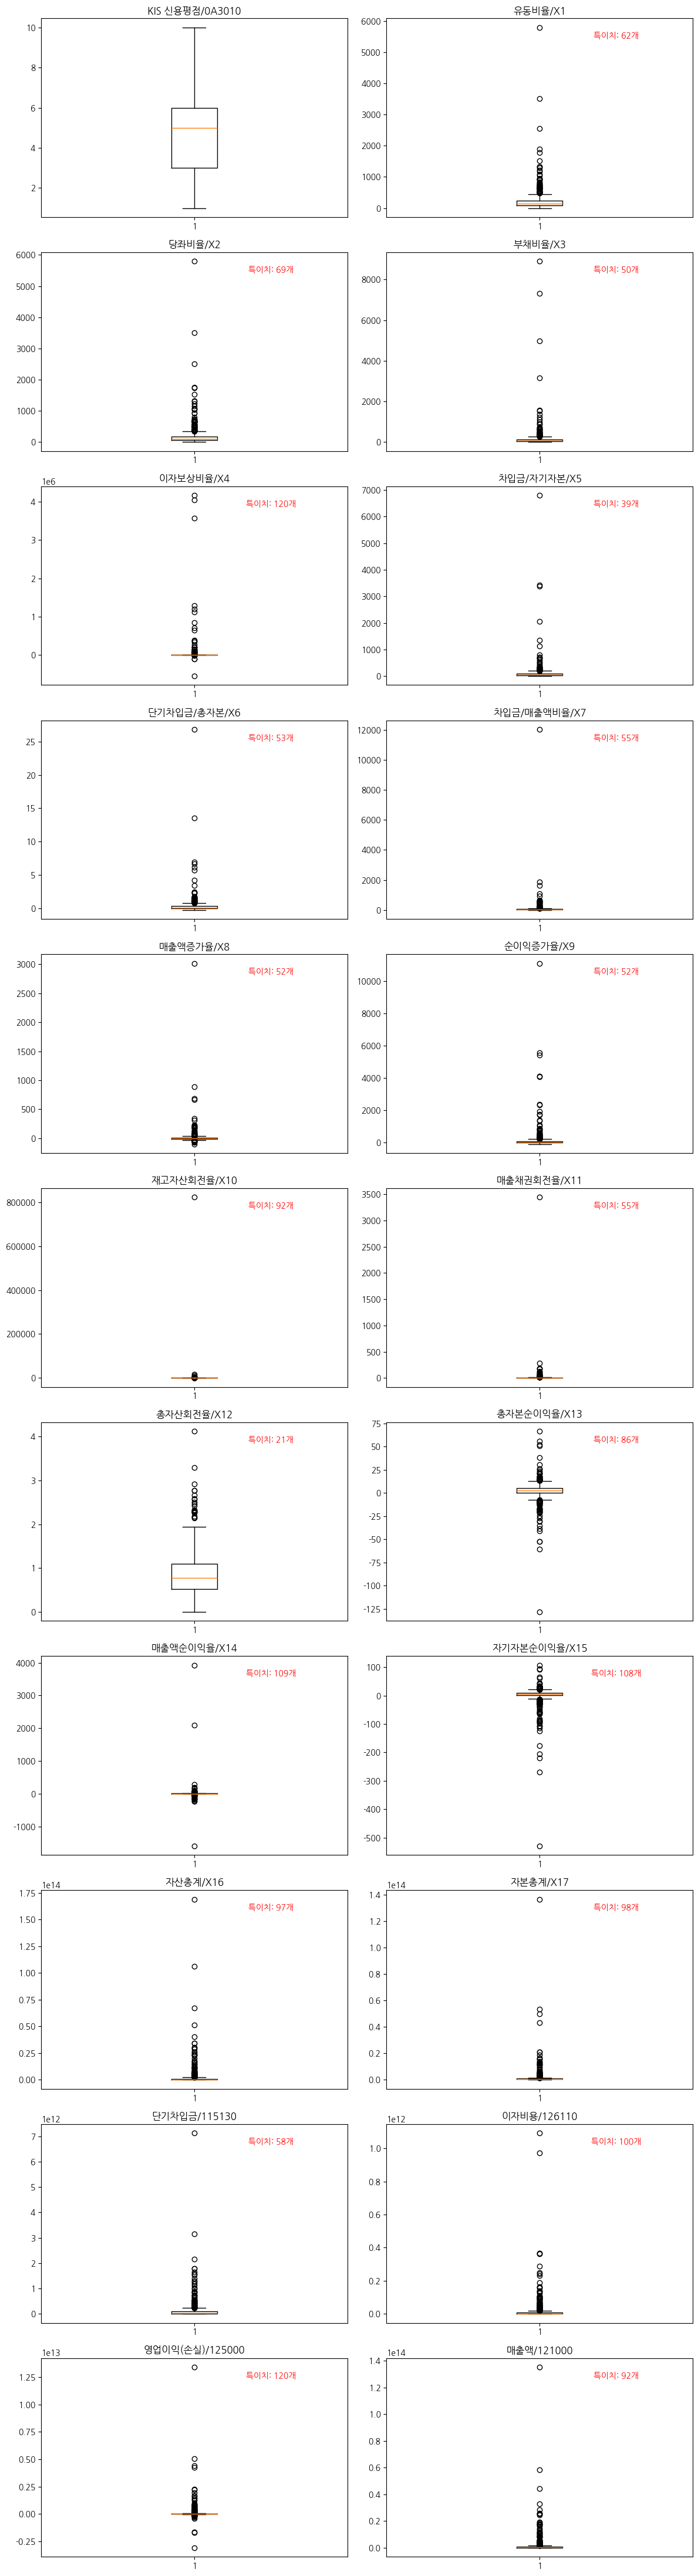

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # 데이터를 만들기 위해 추가

# 1. 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 2. 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 숫자형 컬럼만 선택
numeric_cols = data.select_dtypes(include=np.number).columns
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # 올림 계산으로 수정

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # NaN 값이 있다면 제거
    col_data = data[col].dropna()

    # 박스플롯 그리기
    axes[i].boxplot(col_data)
    axes[i].set_title(col)

    # --- 특이치 계산 및 개수 표시 부분 ---
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # 특이치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 특이치 개수 계산
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    n_outliers = len(outliers)

    # 그래프에 텍스트 추가: 특이치의 갯수 추가.
    if n_outliers > 0:
        # 그래프의 x, y축 범위를 가져와 텍스트 위치를 동적으로 설정
        y_lim = axes[i].get_ylim()
        x_lim = axes[i].get_xlim()
        # 텍스트 위치: 오른쪽 상단
        text_x = x_lim[0] + (x_lim[1] - x_lim[0]) * 0.75
        text_y = y_lim[0] + (y_lim[1] - y_lim[0]) * 0.9
        axes[i].text(text_x, text_y, f'특이치: {n_outliers}개', fontsize=10, color='red', ha='center')
    # ------------------------------------

# 남는 subplot은 숨기기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##로그변환

In [ ]:
# 이전 단계에서 확인된 넓은 분포와 이상치 문제를 완화하기 위해 로그 변환을 적용합니다.
print("\n▼ 부호화 로그 변환 시작")
cols_to_transform = df.columns.drop(['KIS', 'Name', '신용등급(우량,불량)', 'KIS 신용평점/0A3010'])

for col in cols_to_transform:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = np.sign(df[col]) * np.log1p(np.abs(df[col]))

print("   - 완료: 독립변수들에 대해 로그 변환을 적용했습니다.")


▼ 부호화 로그 변환 시작
   - 완료: 독립변수들에 대해 로그 변환을 적용했습니다.


# 특이치 로그변환, 후 상자그림(Box Plot)

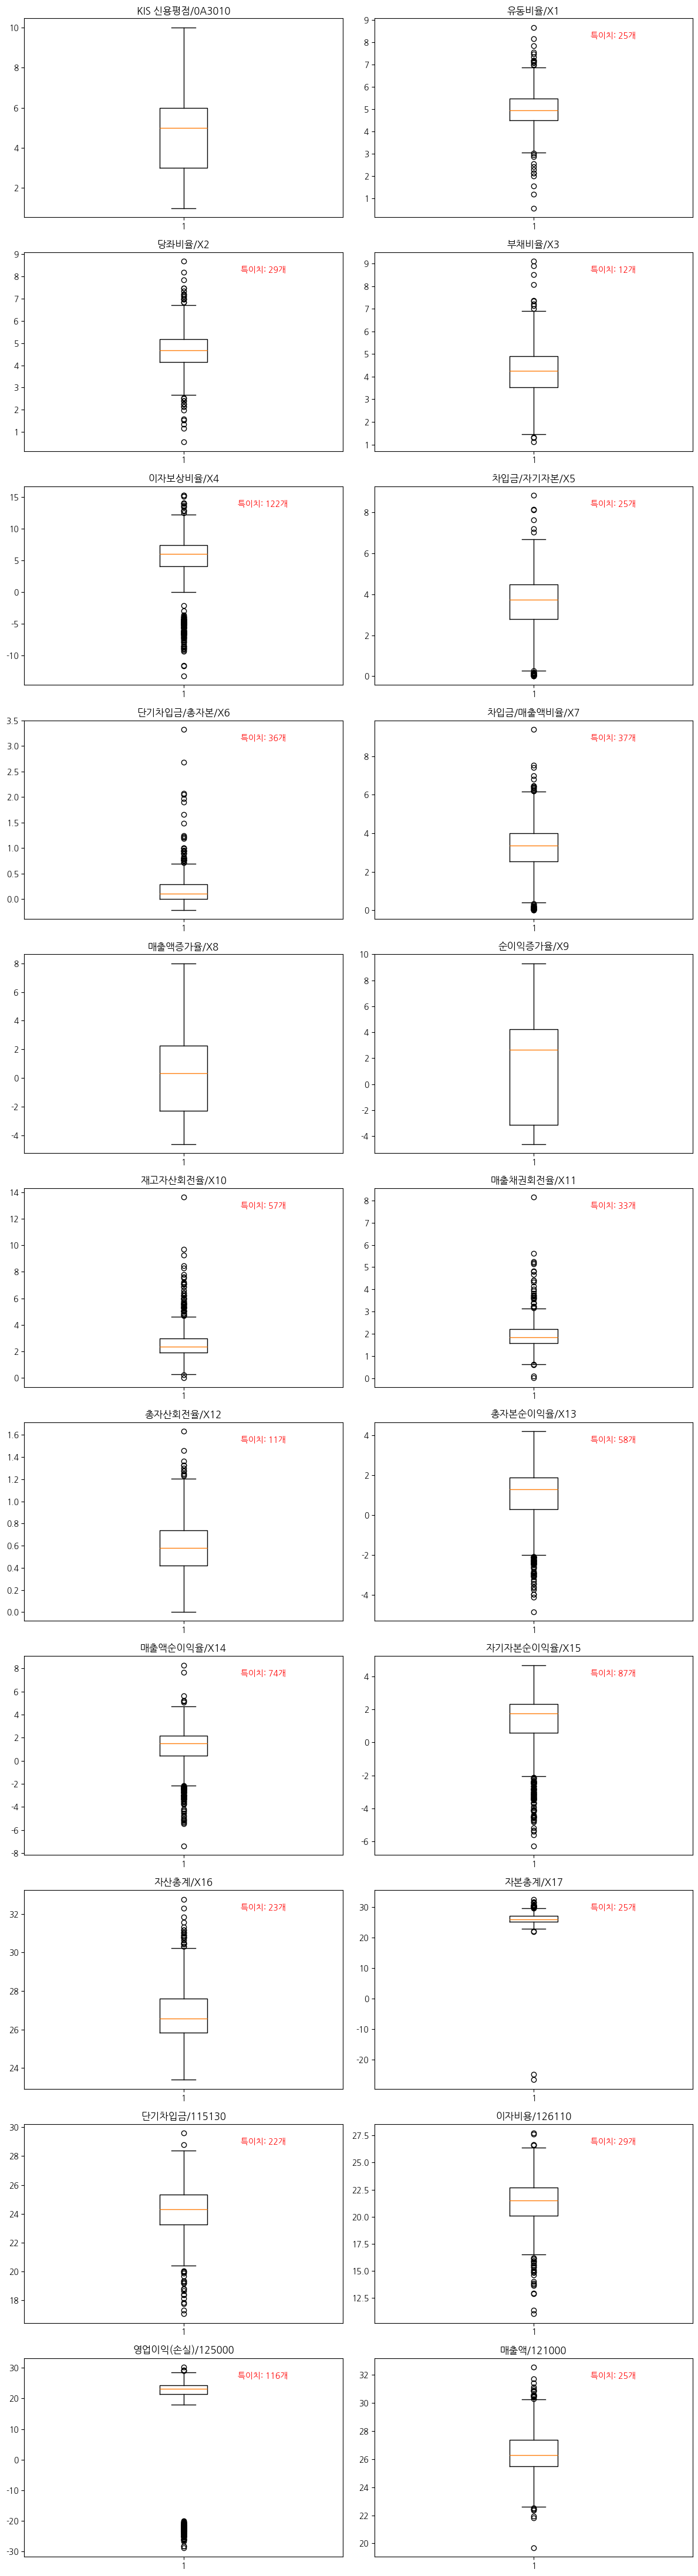

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # 데이터를 만들기 위해 추가

# 1. 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 2. 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 숫자형 컬럼만 선택 (로그 변환된 df 데이터 사용)
numeric_cols = df.select_dtypes(include=np.number).columns
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # 올림 계산으로 수정

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # NaN 값이 있다면 제거
    col_data = df[col].dropna() # df 데이터 사용

    # 박스플롯 그리기
    axes[i].boxplot(col_data)
    axes[i].set_title(col)

    # --- 특이치 계산 및 개수 표시 부분 ---
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # 특이치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 특이치 개수 계산
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    n_outliers = len(outliers)

    # 그래프에 텍스트 추가: 특이치의 갯수 추가.
    if n_outliers > 0:
        # 그래프의 x, y축 범위를 가져와 텍스트 위치를 동적으로 설정
        y_lim = axes[i].get_ylim()
        x_lim = axes[i].get_xlim()
        # 텍스트 위치: 오른쪽 상단
        text_x = x_lim[0] + (x_lim[1] - x_lim[0]) * 0.75
        text_y = y_lim[0] + (y_lim[1] - y_lim[0]) * 0.9
        axes[i].text(text_x, text_y, f'특이치: {n_outliers}개', fontsize=10, color='red', ha='center')
    # ------------------------------------

# 남는 subplot은 숨기기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##신용평점 데이터 분포확인 및 희소데이터(1등급)누락후 df재할당

##결측치 갯수 및 비율 확인

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/25-2 금융빅데이터/chapter 06/금융데이터셋(Kospi)__673(version 2).xls", sheet_name="금융데이터셋(673)")
print('신용평점 데이터 확인')
# # df.groupby('KIS 신용평점/0A3010').size().sort_values(ascending=False)
# credit_counts_groupby = df.groupby('KIS 신용평점/0A3010').size()
# print(credit_counts_groupby)
df.groupby('KIS 신용평점/0A3010').size().sort_values(ascending=False)

신용평점 데이터 확인


,0
KIS 신용평점/0A3010,
5,120
4,108
3,104
6,103
2,89
7,70
8,46
9,19
10,11



- 신용평점이 1인 데이터는 2개밖에 존재하지 않는다(희귀한 데이터).
적은 데이터로는 머신 러닝의 학습, 검증 단계에서 오류가 발생하기도 하고, 된다고 하더라도 신뢰 가능한 예측을 할 수 없다.
따라서 1등급을 제거 후 분석을 진행한다.
- 한계점: 희귀한 데이터(1등급)의 삭제로 해당 등급에 대한 예측은 불가능하다.


In [ ]:
print('\n신용평점 1등급 데이터 배제')
print('신용평점 1등급 누락처리 완료')
df = df[df['KIS 신용평점/0A3010'] != 1]
# display(df.groupby('KIS 신용평점/0A3010').size().sort_values(ascending=False))
# df.shape


print('신용평점 데이터 확인')
# credit_counts_groupby = df.groupby('KIS 신용평점/0A3010').size()
# print(credit_counts_groupby)
display(df.groupby('KIS 신용평점/0A3010').size().sort_values(ascending=False))
df.shape


신용평점 1등급 데이터 배제
신용평점 1등급 누락처리 완료
신용평점 데이터 확인


,0
KIS 신용평점/0A3010,
5,120
4,108
3,104
6,103
2,89
7,70
8,46
9,19
10,11


(670, 25)

##희소데이터 1등급을 버렸는가 전체 데이터도 부족한데 왜?


- 특정 데이터가 매우 희소한 경우
종속변수의 특정 카테고리 데이터가 매우 적은 경우, 제거하는 것이 좋다.  

-  희소 데이터를 제거해야 하는 이유
- 데이터가 총 672개중 단 2개밖에 없었음
* 2개의 데이터로는 학습 자체가 되지 않음,  

머신러닝은 데이터의 패턴을 학습함, 그러나 데이터가 적으면 패턴 학습이 안됨.  이는 2개의 데이터로는 1등급이라는 전체 그룹의 재무적 특성을 완벽히 대표하지 못하며 데이터 과적합(오버플로우)을 유발할수 있다.  
오히려 특이점으로 받아들일 수 있음

* 서열형 로지스틱 분석에서 불균형 데이터로 인해 불안정해 질 수 있음
* 샘플링 기법 적용 불가능해 진다.


우리의 데이터는 전체 672개 중 결측치가 있는 부분을 제거하고나면 300개만 남았다.  
결측치 채우는 전략 중 가장 많이 사용되는 방법 2가지 있다.  
우리는 MICE을 사용하는 걸로 가며 하나의 열을 종속변수로 두고, 나머지 변수를 독립변수로 하는 회귀 모델을  
순차적으로 학습해 결측치를 예측하는 방식으로 진행하게 된다. 장점으로는 변수간 상관관계나 패턴을 유지할수 있지만, 비선형 관계에서는 한계가 있다 우리는 신용등급 예측 모델을 만들 경우라 하나의 열을 종속변수로 두어 결측치를 예측하는 방식을 사용하게 되었다.

#### 결측치 비율이 높지만 분석에 있어서 중요도가 높은 것으로 추정되는 열에 대해 대체 가능한 열을 찾지 못하였다.<br>
하지만 결측치가 있는 행에 대해 삭제를 진행하자니 전체 672개 중 결측치가 있는 부분을 제거하고나면 300개만 남는다.  
데이터의 손실이 너무 심하기에 삭제보다 결측치를 채우는 방법을 사용해보자.  
<br>
<br>
결측치 채우는 전략 중 가장 많이 사용되는 방법 2가지 있다.
* MICE(Multivariate Imputation by Chained Equation)
하나의 열을 종속변수로 두고, 나머지 변수를 독립변수로 하는 회귀 모델을  
순차적으로 학습해 결측치를 예측하는 방식  
scikit-learn의 IterativeImputer 사용  
장점: 변수 간의 상관관계나 패턴을 유지할 수 있다  
단점: 계산량이 많고, 비선형 관계에는 한계가 있음  
<br>

* KNN Imputation  
결측치가 있는 샘플과 가장 유사한 K개의 샘플을 찾아 평균(또는 최빈값)으로 채움
scikit-learn KNNImputer 사용  
장점: 비선형 관계에도 대응 가능  
단점: 대규모 데이터에서는 느림, 스케일링 필요 + 특이치의 상관관계가 훼손될 수 있음
<br>

우리는 두 방법 중 MICE를 통해 결측치를 대체하려 한다.
- MICE는 변수 간의 상관관계나 패턴을 유지해주는 장점을 가지고 있는데, 우리가 사용하는 회계식 기반의 금융 데이터는 서로 상관관계가 강하게 있기 때문에, 특이치의 상관관계가 훼손될 수 있는 KNN Imputation이 아닌 MICE를 통해 대체한다.

In [ ]:
# 결측치 갯수 및 비율
totalMissingCnt = df.isnull().sum()
missingRate = (df.isnull().mean() * 100).round(2)
missingDf = pd.DataFrame({'결측치 개수':totalMissingCnt, '결측치 비율':missingRate})
missingDf.sort_values('결측치 개수', ascending=False, inplace=True)
print(f"   - 현재 데이터 크기: {df.shape}")
missingDf

   - 현재 데이터 크기: (670, 25)


,결측치 개수,결측치 비율
순이익증가율/X9,222,33.13
단기차입금/115130,142,21.19
차입금/자기자본/X5,80,11.94
차입금/매출액비율/X7,57,8.51
재고자산회전율/X10,42,6.27
이자비용/126110,35,5.22
매출채권회전율/X11,15,2.24
자기자본순이익율/X15,6,0.90
매출액증가율/X8,4,0.60
부채비율/X3,2,0.30


# 결측치 개수, 비율 확인 및 모든 특이치 로그변환 결측치 MICE로 대체



In [ ]:
# 결측치 대체에서 제외할 열
# 종속변수와
# 범주형 데이터와 문자열이 포함된 데이터를 결측치 대체가 안됨(에러 유발)
cols_to_exclude = ['KIS', 'Name', '신용등급(우량,불량)', 'KIS 신용평점/0A3010']

# 수치형 변수 선택 (종속변수 및 범주형 제외)
numeric_cols = df.columns.difference(cols_to_exclude)

# --- 부호화 로그 변환 (Imputation 전) ---
# 음수의 부호(sign)를 보존하고, 절대값(abs)에만 log1p를 적용합니다.
df_numeric_log = np.sign(df[numeric_cols]) * np.log1p(np.abs(df[numeric_cols]))
# ------------------------------------

# 결측치 대체를 위한 Imputer 객체 생성
imputer = IterativeImputer(
     max_iter=20,                 # 사이클 반복 횟수, 클수록 오래 걸림
    random_state=42,             # 재현 가능
    initial_strategy='median',   # 초기값: 중앙값: 이상치에 덜 민감하게 반응
    imputation_order='ascending' # 결측 적은 열부터 처리, 대체 안정성이 증가함.
)

# imputer.fit_transform() 을 실행하면 결과는 Numpy 배열이 나옴
# 그러므로 데이터프레임으로 변환하고,
# 열 이름을 유지하도록 해야 함.
df_numeric_imputed = pd.DataFrame(
    imputer.fit_transform(df_numeric_log),
    columns=numeric_cols,
    index=df_numeric_log.index # df_numeric_log의 인덱스를 사용하여 원본 df와 정렬
)

# --- 변경된 부분: excluded_columns는 df에서 직접 복사하고, numeric_cols는 imputed_values로 업데이트 ---
# df_imputed를 excluded_columns로 초기화하여 원본 값을 유지합니다.
df_imputed = df[cols_to_exclude].copy()

# df_imputed에 impute된 numeric_cols 값을 할당합니다.
for col in numeric_cols:
    df_imputed[col] = df_numeric_imputed[col]
# ------------------------------------------------------------------------------------------

# 결측치 대체 확인
print(df_imputed.isnull().sum())


# 결측치를 대체한 데이터프레임을 df로 복사
df = df_imputed.copy()

KIS                0
Name               0
신용등급(우량,불량)        0
KIS 신용평점/0A3010    0
단기차입금/115130       0
단기차입금/총자본/X6       0
당좌비율/X2            0
매출액/121000         0
매출액순이익율/X14        0
매출액증가율/X8          0
매출채권회전율/X11        0
부채비율/X3            0
순이익증가율/X9          0
영업이익(손실)/125000    0
유동비율/X1            0
이자보상비율/X4          0
이자비용/126110        0
자기자본순이익율/X15       0
자본총계/X17           0
자산총계/X16           0
재고자산회전율/X10        0
차입금/매출액비율/X7       0
차입금/자기자본/X5        0
총자본순이익율/X13        0
총자산회전율/X12         0
dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# 다중공선성 제거 (1차 변수 선정)

##히트맵 &막대 그래프


▼ 전체 변수 간 상관관계 히트맵


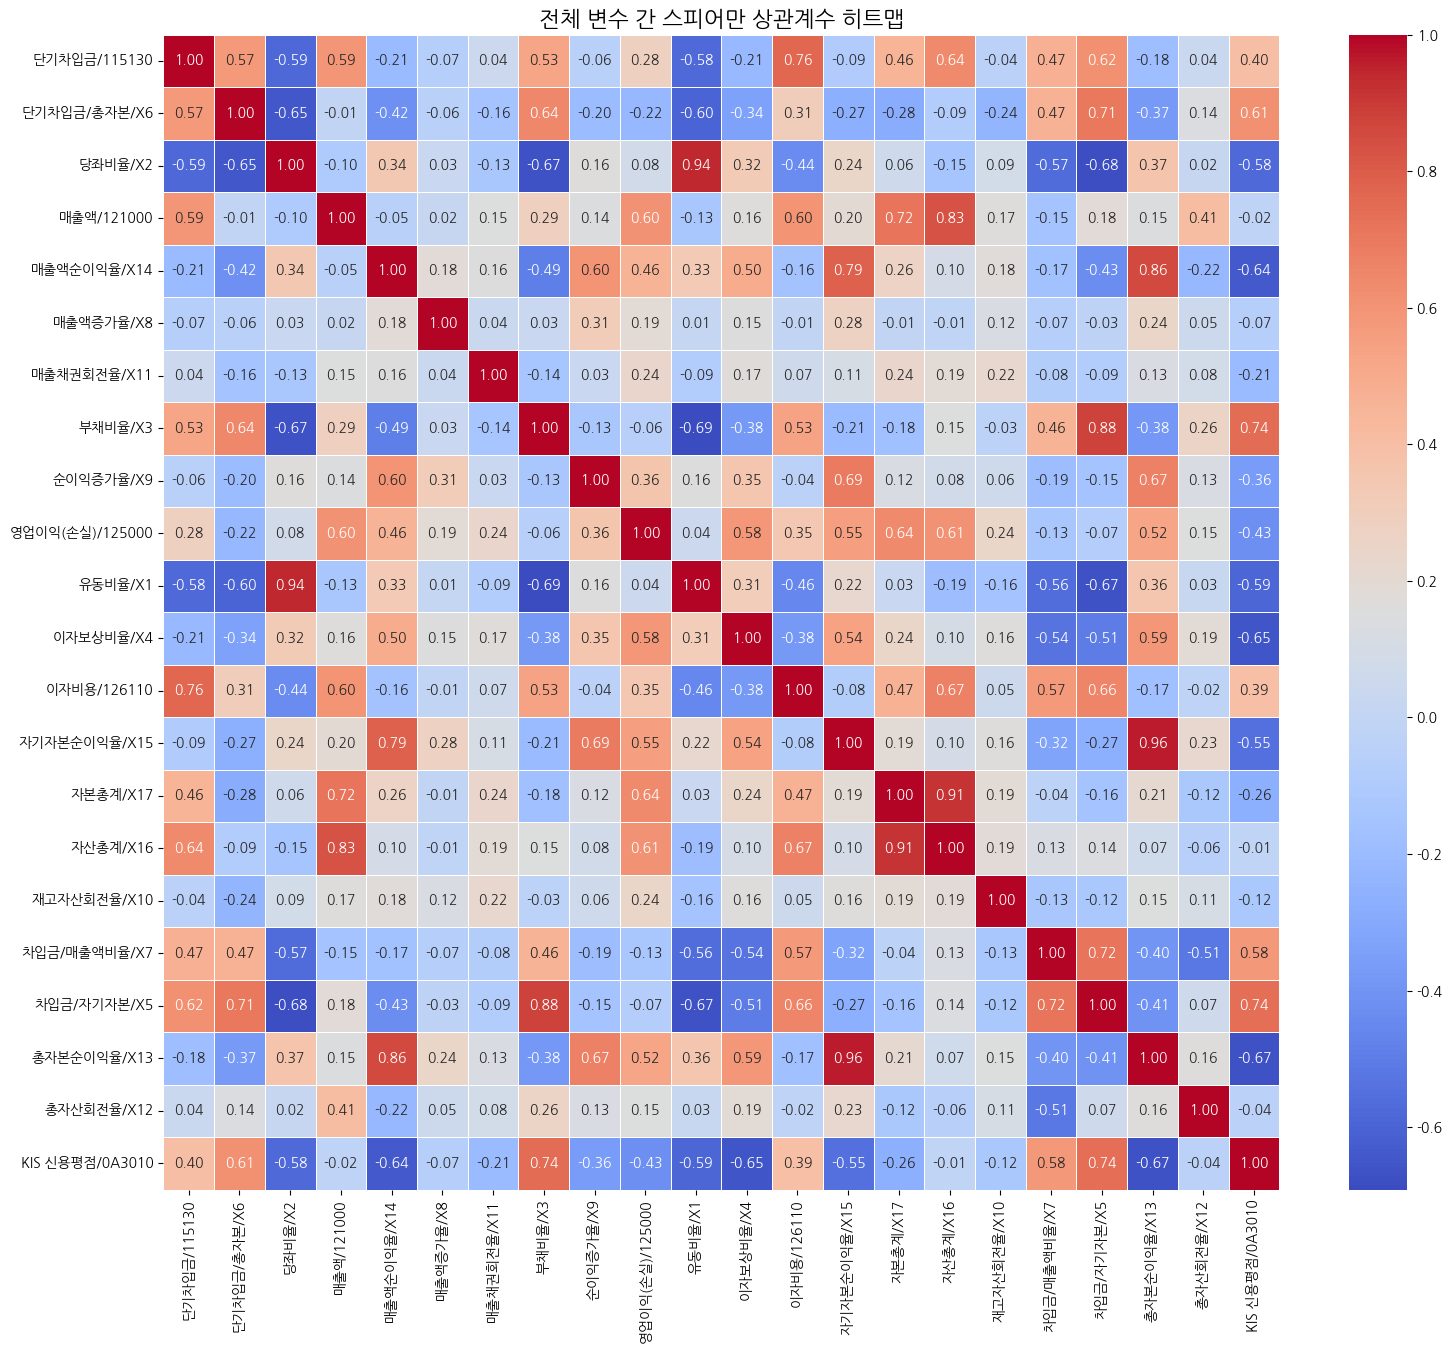

In [ ]:
# 스피어만 상관계수.
# 'KIS 신용평점/0A3010'는 종속변수이므로 상관관계 분석에서 제외하고 독립변수만 선택
numeric_features_for_corr = df.select_dtypes(include=np.number).columns.drop('KIS 신용평점/0A3010').tolist()
correlation_matrix = df[numeric_features_for_corr + ['KIS 신용평점/0A3010']].corr(method='spearman')
credit_score_corr = correlation_matrix['KIS 신용평점/0A3010']

# --- 전체 변수 간 상관관계 히트맵 ---
# 다중공선성 문제를 시각적으로 확인하기 위해 모든 변수 간의 상관관계를 히트맵으로 그립니다.
# 붉은색이 진할수록 강한 양의 상관관계, 푸른색이 진할수록 강한 음의 상관관계를 의미합니다.
print("\n▼ 전체 변수 간 상관관계 히트맵")
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('전체 변수 간 스피어만 상관계수 히트맵', fontsize=16)
plt.show()

## 1. 히트맵 분석
히트맵 분석을 통해 얻을 수 있는 정보는 변수들의 상관관계의 정도를 확인하여 어떤 변수가 최종 목적을 달성하는 데에 큰 기여를 하는 지 알 수 있다는 것이다.
이와 같은 정보가 중요한 이유는 같은 역할은 하는 변수가 여럿 있다면 그 중 어떤 변수가 좋게 작용했는지 알기 힘들기 때문이다.
따라서 도메인 지식과 타겟 변수와의 관계 등을 살펴보며 변수를 걸러내는 작업을 진행해야 한다.

## 히트맵 전반적인 분석 및 주요 관찰 사항
비슷한 종류의 재무 비율끼리 강하게 묶이는 경향이 뚜렷하게 나타남.  

<br>
####1. 매우 강한 양(+)의 상관관계를 보이는 그룹 (0.80) 기준
히트맵에서 진한 붉은색으로 표시된 부분.  
이 변수들은 거의 동일한 정보를 담고 있어 다중공선성을 유발할 가능성이 매우 높다.  


(유동비율/X1) & (당좌비율/X2) (상관계수: 0.94)  
분석: 두 지표 모두 기업의 단기 채무 상환 능력(유동성)을 측정한다.  
당좌비율은 유동비율 계산식에서 재고자산만 제외한 것이라 매우 유사하게 움직이는 것이 당연.  
둘 중 하나만 사용하는 것을 강력히 추천.  


(총자본순이익율/X13), (매출액순이익율/X14), (자기자본순이익율/X15)  
분석: 이 세 지표는 모두 '순이익'을 기반으로 한 '수익성' 지표이다.  
분자에 모두 순이익이 들어가기 때문에 서로 높은 상관관계를 보인 것.  
이 그룹에서도 대표적인 지표 하나만 선택하는 것이 좋다.  


(자산총계/X16) & (자본총계/X17) (상관계수: 0.94)  
분석: 자산 = 부채 + 자본이라는 회계 등식에 따라, 기업의 규모를 나타내는
두 지표는 함께 증가하는 경향이 강함.  


(차입금/자기자본/X5) & (부채비율/X3) (상관계수: 0.89)  
분석: 부채와 자기자본 간 비율 구조를 나타내며, 수식 상에서도 유사함이 발견된다.
부채 수준과 자본 간의 관계를 표현하는 재무 지표이다.  


(매출액/121000) & (자산총계/X16) (상관계수: 0.83)  
분석: 일반적으로 기업의 운영규모가 클수록 보유 자산의 규모도 크고, 이에 따라 매출액도 증가하는 경향이 있다.  
따라서 영업 활동 규모를 나타내는 매출액과 기업의 재무 규모를 나타내는 자산총계 간에 양의 상관관계를 볼 수 있다.  

<br>

#### 2. 의미 있는 음(-)의 상관관계를 보이는 그룹 (-0.65 기준)  
히트맵에서 진한 푸른색으로 표시된 부분.  


(부채비율/X3) & (유동비율/X1, 당좌비율/X2)  
분석: 부채비율(안정성)이 높을수록 유동비율(유동성)은 낮아지는 경향을 보인다.
즉, 빚이 많은 회사일수록 단기 채무 상환 능력이 떨어질 수 있다는 합리적인 관계를 보여줌.  


(KIS 신용평점/0A3010) & (이자보상비율/X4, 총자본순이익율/X13)  
[중요] 신용평점과 음의 상관관계에 있다는 것은 변수의 값이 상승하면 신용평점의 등급이 올라간다(숫자는 낮아지고)는 뜻이다.  
분석: 이자보상비율과 총자본순이익율이 높으면 기업의 재무 안정성과 수익성이 우수하다는 뜻으로, 신용위험이 낮아져 신용평점 점수는 낮아지는 합리적인 음의 상관관계가 형성된다.  


(단기차입금/총자본/X6) & (당좌비율/X2)  
분석: 총자본 대비 단기차입금이 많으면 유동부채가 많다는 뜻이므로 당좌비율이 낮아질 가능성이 크다.  
즉 단기 부채 비중이 높을수록 유동성 커버 능력이 떨어질 수 있다.  



<br>

#### 3. 다른 변수들과 관계가 거의 없는 변수
(매출액증가율/X8), (순이익증가율/X9):  

분석: 이 두 '성장성' 지표는 다른 '안정성'이나 '수익성' 지표들과 뚜렷한 상관관계를 보이지 않는다.  
이는 이전에 산점도 분석에서 확인했던 "성장성이 높다고 반드시 재무적으로 안정적이거나 수익성이 좋은 것은 아니다"  
라는 결론을 다시 한번 뒷받침한다.  



▼ 신용등급과 변수 간의 관계 시각화


/tmp/ipython-input-4048651112.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credit_worthiness.values, y=credit_worthiness.index, palette='RdYlGn')


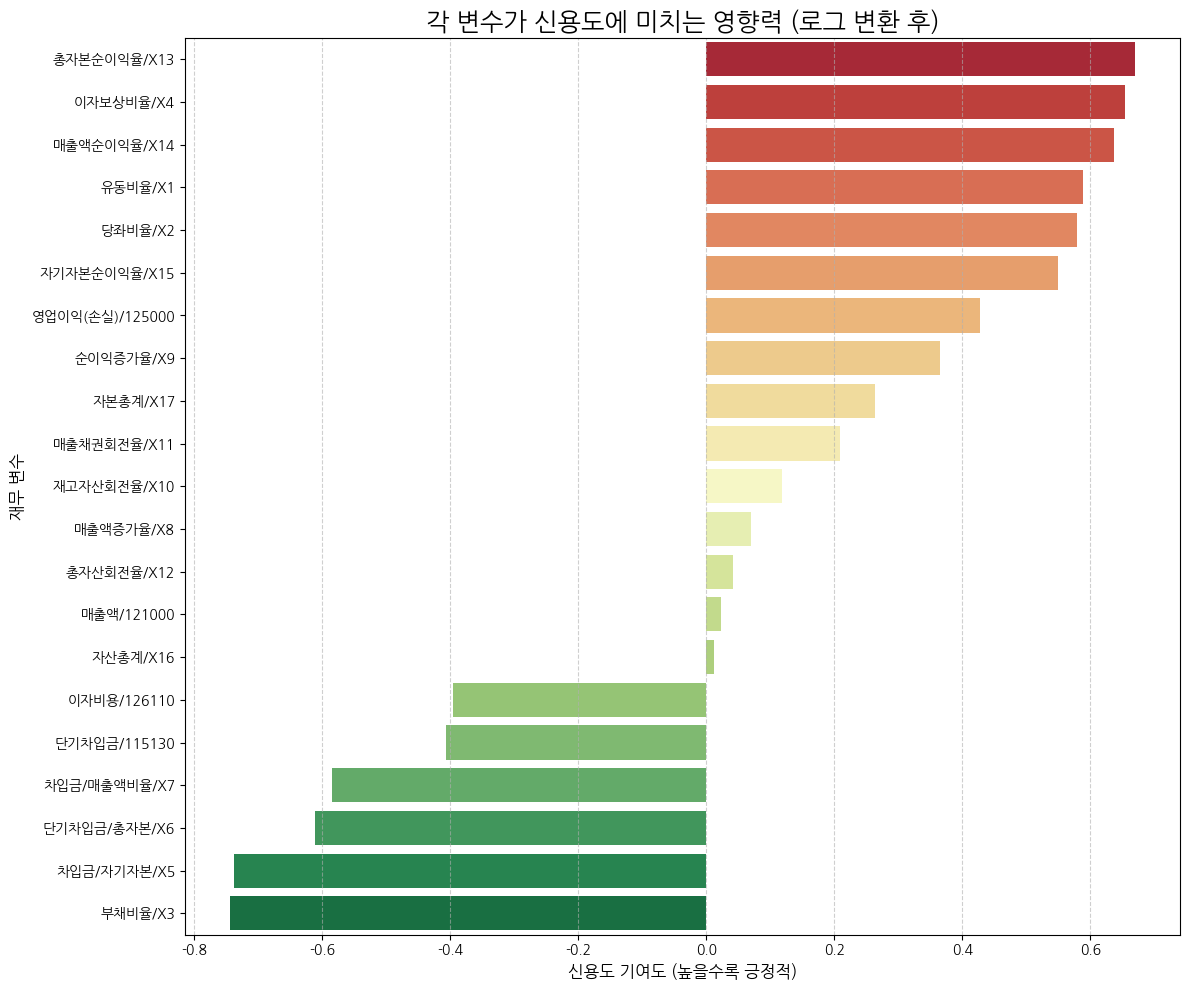

In [ ]:
# KIS 신용평점은 점수가 '낮을수록' 우량하므로, 해석의 편의를 위해 -1을 곱합니다.
# 이렇게 하면 '높을수록' 신용도에 긍정적인 변수로 해석할 수 있습니다.
# 종속변수인 'KIS 신용평점'과 각 독립변수들이 어떤 관계를 가지는지 확인합니다.
print("\n▼ 신용등급과 변수 간의 관계 시각화")

credit_worthiness = credit_score_corr * -1
credit_worthiness = credit_worthiness.sort_values(ascending=False).drop('KIS 신용평점/0A3010')

plt.figure(figsize=(12, 10))
sns.barplot(x=credit_worthiness.values, y=credit_worthiness.index, palette='RdYlGn')
plt.title('각 변수가 신용도에 미치는 영향력 (로그 변환 후)', fontsize=18)
plt.xlabel('신용도 기여도 (높을수록 긍정적)', fontsize=12)
plt.ylabel('재무 변수', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 2. 막대그래프 분석
막대그래프를 통해 각 변수가 신용평점에 미치는 영향을 파악할 수 있다. 절댓값이 0에 가까울수록 영향력이 없다는 뜻이고, 멀어질수록 영향력이 크다는 의미이다. 그래프를 그리기 전 단계에서 편의를 위해 음수를 취했기 때문에 양수라면 신용평점에 좋은 영향을, 음수라면 나쁜 영향을 끼친다고 분석할 수 있다. 양수, 음수 각각 높은 변수 5개에 대해 분석해보려한다.
<br><br>
양의 영향력 (절댓값 큰 순서)




음의 영향력 (절댓값 큰 순서)




### 양의 영향력 (절댓값 큰 순서)
총자본순이익율 / X13    
총 자본 대비 순이익률로, 기업의 수익성 지표이며 높을수록 경영 성과가 좋다.
이자보상비율 / X4  
기업의 이자 비용 부담 능력을 나타내며, 높을수록 이자 지급 여력이 충분해 재무 안정성이 뛰어나다.  
매출액순이익율 / X14    
매출액 대비 순이익률로, 수익성의 또 다른 측면이며 높을수록 영업 효율성이 우수하다.  
유동비율 / X1    
단기 채무를 감당할 수 있는 유동자산 대비 유동부채 비율로, 높을수록 단기 유동성이 우수하다.  
당좌비율 / X2  
유동자산 중 재고자산을 제외한 매우 단기성 자산 대비 유동부채 비율로, 높으면 단기 지급능력이 뛰어나다.  
<br>

### 음의 영향력 (절댓값 큰 순서)
부채비율 / X3  
총부채가 자기자본 대비 높은 상태는 재무 안정성 저하로 연결되며 신용도 하락 요인이다.  
차입금 / 자기자본 / X5  
자기자본 대비 차입금 비중이 높을수록 재무레버리지 증가, 부채 부담 과중 시 신용도 악화된다.  
단기차입금 / 총자본 / X6  
단기 차입금의 비중이 높으면 단기 유동성 부담 증가, 채무불이행 가능성 커져 신용도 저하된다.  
차입금 / 매출액비율 / X7  
매출액 대비 차입금 부담이 크면 이익을 통한 차입금 상환 능력이 약화되므로 신용도 악영향을 미친다.  
이자비용 / 126110  
이자 비용이 많다는 것은 금융비용 부담이 크다는 의미로, 재무 건전성을 약화시켜 신용도 하락을 유발한다.  
<br>

## 분석 요약
: 수익성, 유동성, 이자상환 지표가 높을수록 신용도가 좋아지는 양의 관계이다.
: 부채 부탐, 단기 차입금 비율 및 이자비용 증가가 클수록 신용도가 떨어지는 음의 관계이다.

In [ ]:
df.head(2)

,KIS,Name,"신용등급(우량,불량)",KIS 신용평점/0A3010,단기차입금/115130,단기차입금/총자본/X6,당좌비율/X2,매출액/121000,매출액순이익율/X14,매출액증가율/X8,...,이자보상비율/X4,이자비용/126110,자기자본순이익율/X15,자본총계/X17,자산총계/X16,재고자산회전율/X10,차입금/매출액비율/X7,차입금/자기자본/X5,총자본순이익율/X13,총자산회전율/X12
0,001402,한국가스공사,불량,7,27.744350,0.119346,4.961095,30.868993,0.198851,-3.454106,...,4.626700,27.601943,0.488580,29.809811,31.329598,2.362739,4.751087,5.759596,0.122218,0.489133
1,001471,(주)케이티앤지,우량,2,22.338828,0.000853,5.380819,28.668351,3.583797,1.355835,...,11.957214,20.491930,2.922086,29.405377,29.639131,1.420696,0.173953,0.086178,2.733068,0.321204


##vif 분석결과 정리


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 분석에 사용할 숫자형 데이터만 선택 및 클리닝(, 등을 제거)
df_clean = df.drop(['KIS', 'Name', '신용등급(우량,불량)'], axis=1) # 종속변수가 될 수 있는 것과 분석에 필요없는 것은 제외
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].str.replace(',', '', regex=True)
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
df_clean.dropna(inplace=True) # 결측치를 포함한 것을 제거(분석을 위해)


# 독립변수들만 선택 (종속변수 역할을 할 'KIS 신용평점/0A3010'는 제외)
X = df_clean.drop('KIS 신용평점/0A3010', axis=1)

# VIF 계산을 위한 데이터프레임 생성
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# VIF가 높은 순으로 정렬하여 출력
print(vif.sort_values(by="VIF Factor", ascending=False))

      VIF Factor         features
14  45229.409202         자본총계/X17
15  29865.416133         자산총계/X16
3   20835.205188       매출액/121000
12   1151.446493      이자비용/126110
0     959.957497     단기차입금/115130
7     697.004048          부채비율/X3
10    535.983650          유동비율/X1
2     442.876207          당좌비율/X2
18    408.511432      차입금/자기자본/X5
17    240.349764     차입금/매출액비율/X7
19     63.394297      총자본순이익율/X13
13     50.572673     자기자본순이익율/X15
20     32.359701       총자산회전율/X12
11     16.880380        이자보상비율/X4
9      16.627865  영업이익(손실)/125000
4      14.573464      매출액순이익율/X14
6      11.988380      매출채권회전율/X11
16      9.657303      재고자산회전율/X10
1       3.054831     단기차입금/총자본/X6
8       3.027172        순이익증가율/X9
5       1.248951        매출액증가율/X8


### VIF 최종

In [ ]:
# 분석에 사용할 숫자형 데이터만 선택 및 클리닝(, 등을 제거)
df_clean = df.drop(['KIS', 'Name', '신용등급(우량,불량)'], axis=1) # 종속변수가 될 수 있는 것과 분석에 필요없는 것은 제외
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].str.replace(',', '', regex=True)
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
df_clean.dropna(inplace=True) # 결측치를 포함한 것을 제거(분석을 위해)


# 독립변수들만 선택 (종속변수 역할을 할 'KIS 신용평점/0A3010'는 제외)
#
# 자산총계/X16 제거, 매출액/121000, 당좌비율/X2, 자본총계, 단기차입금/115130
# 이자비용/126110, 자기자본순이익율/X15, 차입금/자기자본/X5 제거
X = df_clean.drop(['KIS 신용평점/0A3010','자산총계/X16', '매출액/121000', '당좌비율/X2', '자본총계/X17', '단기차입금/115130', '이자비용/126110', '차입금/자기자본/X5', '자기자본순이익율/X15', '차입금/매출액비율/X7', '매출액순이익율/X14', '유동비율/X1', '영업이익(손실)/125000', '총자산회전율/X12', '매출채권회전율/X11'], axis=1)

# VIF 계산을 위한 데이터프레임 생성
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# VIF가 높은 순으로 정렬하여 출력
print(vif.sort_values(by="VIF Factor", ascending=False))

1회차:  
14  45229.409202         자본총계/X17  
15  29865.416133         자산총계/X16(삭제)  
3   20835.205188       매출액/121000  
12   1151.446493      이자비용/126110  
0     959.957497     단기차입금/115130  
7     697.004048          부채비율/X3  
10    535.983650          유동비율/X1  
2     442.876207          당좌비율/X2  
18    408.511432      차입금/자기자본/X5  
17    240.349764     차입금/매출액비율/X7  
19     63.394297      총자본순이익율/X13  
13     50.572673     자기자본순이익율/X15  
20     32.359701       총자산회전율/X12  
11     16.880380        이자보상비율/X4  
9      16.627865  영업이익(손실)/125000   
4      14.573464      매출액순이익율/X14  
6      11.988380      매출채권회전율/X11  
16      9.657303      재고자산회전율/X10  
1       3.054831     단기차입금/총자본/X6  
8       3.027172        순이익증가율/X9  
5       1.248951        매출액증가율/X8  
<br>
3   20786.805306       매출액/121000  (삭제)  
14  17401.780210         자본총계/X17  
12   1146.314625      이자비용/126110  
0     956.236704     단기차입금/115130  
10    529.227330          유동비율/X1  
2     429.759478          당좌비율/X2  
17    399.918521      차입금/자기자본/X5  
16    225.732022     차입금/매출액비율/X7  
7     190.790454          부채비율/X3  
18     57.530773      총자본순이익율/X13  
13     42.487999     자기자본순이익율/X15  
19     26.673714       총자산회전율/X12  
11     16.717889        이자보상비율/X4  
9      16.378469  영업이익(손실)/125000  
4      14.305111      매출액순이익율/X14  
6      11.683383      매출채권회전율/X11  
15      9.629453      재고자산회전율/X10  
8       3.026092        순이익증가율/X9  
1       3.022880     단기차입금/총자본/X6  
5       1.216194        매출액증가율/X8  

  
제거된 변수: 자산총계/X16, 매출액/121000  
자산총계는 막대플롯 비교시 자산총계가 자본총계와 비교했을시 영향력이 미미하고 총자산회전(매출액/자산총계) 과 중복적인 변수이다, 또한 자산총계와 매출액은 서로 값이 큰것도 문제이고 비슷하게 움직여서 모델을 혼란스럽게 만들수 있어서 삭제함



  
2회차:  
13  2022.059849         자본총계/X17  
0    953.457285     단기차입금/115130  
11   802.710060      이자비용/126110  
9    529.151863          유동비율/X1  
2    429.698816          당좌비율/X2(삭제)  
16   247.932723      차입금/자기자본/X5  
6    130.642445          부채비율/X3  
17    55.654396      총자본순이익율/X13  
15    49.227560     차입금/매출액비율/X7  
12    41.376855     자기자본순이익율/X15  
10    16.572702        이자보상비율/X4  
8     16.371640  영업이익(손실)/125000  
18    15.961429       총자산회전율/X12  
3     14.163579      매출액순이익율/X14  
5     11.342974      매출채권회전율/X11  
14     9.425571      재고자산회전율/X10  
7      3.026032        순이익증가율/X9  
1      2.916843     단기차입금/총자본/X6  
4      1.177189        매출액증가율/X8  
<br>
제거된 변수: 당좌비율/X2  
제일 vif값 삭제전 중복변수를 삭제하는 것이 낫다고 판단하여 당좌비율과 유동비율과의 거의 비슷한 상관계수 0.94를 나타내기에 둘중 삭제한다면 당좌비율을 삭제함(복잡한 문제보다 원인이 명확한 문제부터 해결하고자함)

<br>  

12  2013.693017         자본총계/X17(삭제)  
0    940.949509     단기차입금/115130  
10   801.687284      이자비용/126110  
15   247.538556      차입금/자기자본/X5  
5    130.547278          부채비율/X3  
16    54.839143      총자본순이익율/X13  
14    49.160966     차입금/매출액비율/X7  
8     49.080678          유동비율/X1  
11    40.915845     자기자본순이익율/X15  
9     16.539314        이자보상비율/X4  
7     16.250565  영업이익(손실)/125000  
17    15.755679       총자산회전율/X12  
2     13.991984      매출액순이익율/X14  
4     10.501198      매출채권회전율/X11  
13     6.110033      재고자산회전율/X10  
6      3.019960        순이익증가율/X9  
1      2.916291     단기차입금/총자본/X6    
3      1.176458        매출액증가율/X8

제거된 변수: 자본총계/X17  
VIF 값이 2013.7로 압도적으로 가장 높고 다른 독립녀수와 정보가 겹쳐기 때문 다른 독립 변수 조합으로 해소가능하여 삭제처리함.

3회차:  
10  387.498991      이자비용/126110(삭제)  
0   364.350312     단기차입금/115130(삭제)  
14  140.878479      차입금/자기자본/X5(삭제)  
5   122.950794          부채비율/X3  
15   53.136559      총자본순이익율/X13  
13   48.187162     차입금/매출액비율/X7  
11   40.587147     자기자본순이익율/X15(삭제)  
8    35.074285          유동비율/X1  
16   15.740976       총자산회전율/X12  
7    14.375944  영업이익(손실)/125000  
9    14.063484        이자보상비율/X4  
2    13.562148      매출액순이익율/X14  
4     9.729930      매출채권회전율/X11  
12    6.053750      재고자산회전율/X10  
6     3.019952        순이익증가율/X9  
1     2.791026     단기차입금/총자본/X6  
3     1.176221        매출액증가율/X8  

제거된 변수: 단기차입금/115130(부채규모), 이자비용/126110(부채비용), 차입금/자기자본/X5(부채 구조), 자기자본순이익율/X15(부채 효과)  
제일 높은 이자비용을 삭제시 다음 부채와 관련된 단기차입금, 차입금,자기자본순이익율이 단계적으로 상위로 나올 확률 높은 다중공성성 변수들이라 한번에 삭제 처리하였음.


4회차:  
11   15.280952      총자본순이익율/X13  
7    13.999264          유동비율/X1  
1    12.763623      매출액순이익율/X14  
6    10.134756  영업이익(손실)/125000  
12    9.698789       총자산회전율/X12  
8     9.616899        이자보상비율/X4  
3     9.116075      매출채권회전율/X11  
10    8.769080     차입금/매출액비율/X7(삭제)  
9     5.451616      재고자산회전율/X10  
4     3.326373          부채비율/X3  
5     2.934938        순이익증가율/X9  
0     2.198718     단기차입금/총자본/X6  
2     1.156300        매출액증가율/X8  

제거된 변수: 차입금/매출액비율/X7  
vif수치가 8이였지만 막대그래프에서 봤을때 총자본순이익율이 핵심변수이므로 중복변수인 차입금/매출액비율을 삭제처리함.

5회차:  
10   14.996085      총자본순이익율/X13  
1    12.437217      매출액순이익율/X14(삭제)  
7    11.133732          유동비율/X1  
11    8.805894       총자산회전율/X12  
6     8.760751  영업이익(손실)/125000  
3     8.376878      매출채권회전율/X11  
8     8.119379        이자보상비율/X4  
9     5.338020      재고자산회전율/X10  
4     3.099712          부채비율/X3  
5     2.925417        순이익증가율/X9  
0     1.710401     단기차입금/총자본/X6  
2     1.155904        매출액증가율/X8   

제거된 변수: 매출액순이익율/X14  
핵심 변수 총자본순이익율과 중복변수이며 핵심변수인 총자본순이익율을 살리고 매출액이익율울 제거처리함.


6회차:  
6    10.561509          유동비율/X1(삭제)  
5     8.759885  영업이익(손실)/125000  
2     8.247042      매출채권회전율/X11  
7     8.116134        이자보상비율/X4  
10    6.168604       총자산회전율/X12  
8     5.178152      재고자산회전율/X10  
9     4.590302      총자본순이익율/X13  
3     3.090680          부채비율/X3  
4     2.886516        순이익증가율/X9  
0     1.666794     단기차입금/총자본/X6  
1     1.135402        매출액증가율/X8  

제거된 변수: 유동비율/X1  
vif값들이 어느정도 안정화되어가는게 눈으로 확인 가능하나 아직 10이상의 vif값을 가진 유동비율이 있음 따라서 기본원칙으로 유동비율을 삭제 처리하기로 함.


7회차:  
8.751497  영업이익(손실)/125000(삭제)   
6    8.109063        이자보상비율/X4  
2    6.785506      매출채권회전율/X11  
7    5.081353      재고자산회전율/X10  
9    5.075323       총자산회전율/X12  
8    4.268949      총자본순이익율/X13  
3    2.829978          부채비율/X3  
4    2.699902        순이익증가율/X9  
0    1.666651     단기차입금/총자본/X6  
1    1.134975        매출액증가율/X8  

제거된 변수: 영업이익(손실)/125000  
이제 모든 vif값들이 안정화 상태로 변하였음 하지만. 아직 변수는 많으며 다른 독립 변수를 보았을때 수익성,안정성 지표와 의미적으로 중복(이자보상율)을 해소하는 단계로 모델을 더욱 간결성있게하기 위해 삭제 처리함.

8회차:  
2    6.772708   매출채권회전율/X11(삭제)  
6    5.064461   재고자산회전율/X10  
8    5.056707    총자산회전율/X12(삭제)  
7    4.179701   총자본순이익율/X13  
3    2.829803       부채비율/X3  
5    2.811263     이자보상비율/X4  
4    2.698485     순이익증가율/X9  
0    1.666114  단기차입금/총자본/X6  
1    1.125644     매출액증가율/X8  

제거된 변수: 총자산회전율/X12, 매출채권회전율/X11  
vif값을 보았을때 매출채권회전, 재고자산 회전율,총자산회전율에서 제일 높은 매출채권 회전율을 삭제할시 다음 회차에서는 유사한 재고 회전율이나 총자산 회전율이 1위를 할 확율이 매우 높은 변수들임 따라서 영향력이 비슷한 3개중 2개만 삭제처리함

-> 최종적으로 제거된 변수 목록
- 자산총계/X16  
-매출액/121000  
-당좌비율/X2  
-자본총계/X17  
-단기차입금/115130  
-이자비용/126110  
-차입금/자기자본/X5  
-자기자본순이익율/X15  
-차입금/매출액비율/X7  
-매출액순이익율/X14  
-유동비율/X1  
-영업이익(손실)/125000  
-총자산회전율/X12  
-매출채권회전율/X11  

삭제후 최종 변수목록  
6    3.816666   총자본순이익율/X13  
5    3.308736   재고자산회전율/X10  
4    2.683957     이자보상비율/X4  
3    2.453982     순이익증가율/X9  
2    2.357808       부채비율/X3  
0    1.447969  단기차입금/총자본/X6  
1    1.119535     매출액증가율/X8  
  
  최종 변수는 총 7개가 나왔으며 다음 다중 회귀분석을 거쳐 핵심변수를 뽑아낼 예정이다.


##다중회귀분석(OLR)
- KIS 신용평점변수의 신용등급과 같이 순서가 있는 범주형 데이터일 때 각 독립변수 재무변수들이 신용평점 등급에 미치는 영향을 분석하기 위해 사용. 일반적인 선형 회귀분석(OLS)과는 달리 이 모델은 특정 등급보다 더 높은 등급에 속할 확률(누적 확률)을 예측위한 분석단계를 거침.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.miscmodels.ordinal_model import OrderedModel
print("\n▼ 4. 최종 모델링 시작")

# 1. 종속변수와 최종 선택된 독립변수 정의
y = df['KIS 신용평점/0A3010']
final_selected_features = ['총자본순이익율/X13','재고자산회전율/X10','이자보상비율/X4','순이익증가율/X9','부채비율/X3','단기차입금/총자본/X6','매출액증가율/X8']  # 최종 선택된 변수명 직접 지정
X_final = df[final_selected_features]

# 2. 순서형 로지스틱 회귀모델 정의 및 학습
model = OrderedModel(y, X_final, distr='logit')  # intercept 자동 추가됨
model_fit = model.fit(method='bfgs')

# 3. 결과 요약 출력
print("\n▼ 순서형 로지스틱 회귀분석 결과")
print(model_fit.summary())


- OLR모델 간단 설명.  
Log-Likelihood (로그우도)  
: 모델이 데이터를 얼마나 잘 설명하는지를 나타내는 값, 절댓값이 작을수록(즉, 0에 가까울수록) 모델의 적합도에 부합.  
AIC / BIC  
: 모델의 복잡도(변수의 수)를 고려한 적합도 지표, 이값이 낮을 수록 좋은 모델로 평가되며 적합 기준값이 정해져있지 않음.  
coef (계수)  
: 각변수의 종속변수에 미치는 영향력의 방향과 크기를 나타냄, 값이 커지면 신용등급이 나빠질 확륙이 높으며 음수면 신용등급이 좋은 등급을 받을 수 있다고 해석함.  
std err(표준오차)  
: coef계수의 값이 얼마나 정밀한지를 나타내는 불확실척도, 값이 작을수록 좋다고 판단가능하며 값이 크면 추정치에 오차가 많을수 있다는 판단이 가능.  
p-value  
: 변수가 우연히 이 값을 나타낼수 있는지 확인하는 값, 이 변수가 사실은 아무런 영향력이 없다라는 가정으로 0.03~0.05의 최적 값을 기반으로 이 값이 높다면 우연히 일어난 일이다는 것으로 판단 가능함.  
z-value  
:계수coef값을 표준오차로 나눈값임(z= oef/std err) 이 z값이 클수록 영향력이 있다고 판단가능.  


- 단기차입금/총자본/X6.  
: 계수(3.1789)가 매우 크며 p < 0.001. 이는 단기차입금 비중이 신용등급에 미치는 부정적인 영향이 가장 강력함을 의미.  단기차입금 비율이 1단위 증가하면 신용등급이 더 나빠질 단기 유동성 리스크가 신용평가에서 가장 치명적인 감점 요인임을 볼수 있음.  
- 부채비율/X3  
: 계수(1.5775)로 부채비율이 높을수록 기업 재무안정성이 낮다고 판단되어 신용등급이 하락할 가능성을 높여주는 변수로 볼수 있음.  
- 총자본 수익율X13  
계수(-0.8461)며 수익성을 나타내는 총자본 순 이익율이 높을수록 신용등급이 매우 높아질 수 있다고 판단됨(다른 값보다 0에 제일 가까움)  
- 이자보상비율X4  
계수값:-0.1621 이자보상비율을 영업이익으로 이자를 얼마나 감당할수 있는지 나타내는 지표로 비율이 높을수록 신용등급이 좋아질 확율이 높음. + 채무 상황능력은 신용평가의 핵심 요소임.
<br><br>
- 매출액증가율x8  
계수(0.0814)로 매출액 증가율이 높을수록 신용등급이 나빠질수 있다는 것을 알수 있으며 단순 매출이 높다고 신용등급이 높아질수 있다는 사실이 아님을 알수 있음.  
- 재고자산 회전율/X10  
p값이 0.068로 0.003보다 높지만 어느정도의 판단하는데 도움이 될수 있다고 판단, 계수가 양수이고 재고 자산 회전율이 높을수록 부정적인 영향을 받는다는 것을 시사, 불안정한 판매구조를 가질수 있음  
- 순이익 증가율/x9  
: P값이 0.298로 애매한 포지션을 가지고 있음. 분석결과에서는 순이익의 증가율이 신용등급을 설명하는데 유의미한 변수로 적용받고 있지 않다고 볼수 있으며 총자본순이익율이 더 판단에 영향이 깊기때문이라고 봄.


In [ ]:
print("\n▼ 4. 최종 모델링 시작")

# 1. 종속변수와 최종 선택된 독립변수 정의
y = df['KIS 신용평점/0A3010']
final_selected_features = ['총자본순이익율/X13',
                           '이자보상비율/X4',
                           '부채비율/X3',
                           '단기차입금/총자본/X6',
                           '매출액증가율/X8']  # 최종 선택된 변수명 직접 지정
X_final = df[final_selected_features]

# 2. 순서형 로지스틱 회귀모델 정의 및 학습
model = OrderedModel(y, X_final, distr='logit')  # intercept 자동 추가됨
model_fit = model.fit(method='bfgs')

# 3. 결과 요약 출력
print("\n▼ 순서형 로지스틱 회귀분석 결과")
print(model_fit.summary())


### OLS 최종 분석 결과
### 로지스틱 회귀분석을 통해 다음의 변수 5개가 2차로 선정되었다.
- 총자본순이익율/X13, 이자보상비율/X4, 부채비율/X3, 단기차입금/총자본/X6, 매출액증가율/X8


### Log-Likelihood 값은 -931.97이 나왔다. 해당 값은 다른 모델과 비교하였을 때에 어떤 모델이 값이 큰 지를 보고, 더 적합한 모델을 찾는 데에 사용된다.
<br>

### AIC은 변수를 하나씩 뺄 때마다의 설명력을 의미하고, 이 값이 낮을수록 좋은 모델임을 뜻한다.
- 우리는 3번의 OLS를 통해 AIC값이 1890 → 1889 → 1890으로 변화하였고, 큰 차이가 없음을 확인하였다.
<br>

### BIC은 변수를 하나씩 뺄 때마다의 복잡도를 의미하고, 이 값이 낮을수록 좋은 모델임을 뜻한다.
- 우리는 3번의 OLS를 통해 BIC값이 1958 → 1952 → 1949으로 변화하였고, 점점 낮아지는 것을 통해 모델이 개선되고 있음을 확인하였다.
<br>

### p-value 값이 모두 안정되었고, [0.025 0.975] 값들에도 0이 포함되지 않는 것으로 보아 신뢰가 가능한 변수들로 확인된다.
<br>

### z값의 절댓값을 통해 시스템에 대한 영향력을 판단할 수 있는데, 상대적으로 낮은 매출액증가율과 그 외의 높은 변수들이 있음을 확인하였다.
<br>

### coef값을 통해 예측 시스템에 직접적으로 얼마나 영향을 주는지 알 수 있다. 총자본순이익률과 이자보상비율의 값이 높아지면 신용평점의 등급이 낮아지는 것으로 확인된다. (등급이 낮을수록 좋은 것)
<br>

### 아래는 위의 요소들을 근거로 각 변수들에 대한 분석을 진행한 것이다.

### 우선 종속변수에 긍정적인 영향을 주는 변수를 확인한다. (음수)
- 총자본순이익률 (coef=-0.7792, p-value=0.000)
: 기업이 총자본을 활용해 순이익을 얼마나 효율적으로 창출하는지를 나타내는 지표이다. 수치가 높을수록 자본의 효율적 운용을 하고 있다고 이해할 수 있고, 나아가 회사 전체의 수익성과 경영진의 효율성을 평가하는 데에 사용되기도 하는 지표이다. 따라서 총자본순이익룰이 높을수록 신용평점 등급이 좋아지는 것은 타당하다.
- 이자보상비율 (coef=-0.1623, p-value=0.000)
: 기업이 영업이익으로 이자 비용을 몇 배나 갚을 수 있는지를 나타내는 지표이다. 이자보상비율이 좋다는 것은 일반적으로 기업의 부채 상환 능력과 재무 건전성이 좋다고 이해할 수 있다. 따라서 이자보상비율이 증가하면 신용평점 등급이 좋아지는 것은 타당하다.

### 다음은 종속변수의 부정적인 영향을 주는 변수를 확인한다. (양수)
- 부채비율 (coef=1.6169, p-value=0.000)
: 기업의 재무건전성을 평가하는 지표이다. 산업 분야별로 그 기준에 대한 차이는 존재할 수 있지만, 일반적으로 부채비율이 높다는 것을 긍정적으로 보긴 힘들다. 해당 지표를 통해 부채가 자기 자본에 비해 얼마나 의존적인지를 알 수 있기 때문에 부채비율이 높을수록 신용평점 등급이 나빠지는 것은 타당하다.
- 단기차입금/총자본 (coef=3.0104, p-value=0.000)
: 기업의 총자본에서 단기차입금이 차지하는 비중을 나타내는 지표이다. 기업의 단기 유동성 및 재무 건정성을 파악하는데 사용되고, 비율이 높을수록 재무적 위험이 커진다고 판단한다. 따라서 단기차입금/총자본이 높아지면 신용평점 등급이 나빠지는 것은 타당하다.
- 매출액증가율 (coef=0.0885, p-value=0.004)
: 당기 매출액이 전기 매출액에 비해 얼마나 성장했는지를 나타내는 비율이다. 해당 비율이 높을수록 사업 규모가 크게 성장하고 있다는 것을 나타내기 때문에 바로 납득되는 결과는 아니다. 이를 이해하기 위한 시나리오를 생각해보았다.
	1. 단순히 매출액 증가만을 위해 영업비용을 높게 잡아서 생긴 매출액 상승 경우 혹은 과도한 할인으로 인한 매출액 상승의 경우, 실질적인 영업이익으로 이어지지 않기 때문에 수익성 악화로 인한 재무건전성 악화를 예상할 수 있다. 따라서 이 경우 매출액의 증가가 신용평점 평가에 악영향을 줄 수 있다.
	2. 무분별한 외상판매를 실행하여 일시적으로 매출액이 상승했다면, 기업으로 즉시 현금이 들어오는 것은 아니기 때문에 기업의 유동성 부담이 커질 수 있다. 이 경우 현금흐름, 유동성에 대한 문제로 채무 상환 및 운영자금 조달에 어려움이 생길 확률이 증가하고, 나아가 신용평점 평가에 악영향을 줄 수 있다.

  이를 근거로 매출액증가율은 신용평점에 긍정적인 영향, 부정적인 영향을 동시에 줄 수 있는 변수이고, 그에 따라 z와 coef의 절댓값이 낮음을 이해할 수 있다.
<br>

위의 2가지 시나리오를 통해 매출액상승률 자체는 상승해도 기업의 신용도를 평가할 때에는 악영향을 줄 수 있는 경우가 있음을 알 수 있고, 매출액상승에 따른 신용평점 악화를 설명할 수 있다.

#랜덤포레스트

랜덤포레스트의 간단한 설명
- precision(정밀도)  
: 모델이 예측한 것 중에 실제로 맞는 비율, 이 값이 높을수록 모델 예측의 신뢰도가 있다.
- recall(재현율)  
: 실제 데이터 중 모델이 정확히 맞춘 비율, 실제 10개의 데이터 중 7개만 찾아냈다면 재현율은 70% 즉 값이 높을수록 모델은 데이터에 맞춰 잘찾아낸다는 의미.  
- f1-score(F1점수)  
: 이 값이 높을수록 성능이 안정적이며 우수하다고 평가가능, 정밀도와 재현율은 반비례관계인 경우가 많으므로 F1값은 두 값을 균형있게 고려한 값임.  
- support(서포트)  
: 예를들어 1등급이 서포트값이 15라면 실제 데이터 1등급의 기업이 15개가 있었다는 의미로 이값은 각 등급의 데이터 분포와 특정 값이 낮은 이유가 데이터 부족인지 유추하는데 사용함.  
<br><br>
- accuacy(정확도)  
: 전체 데이터 중 모델이 올바르게 예측한 비율, 가장 직관적으로 확인 가능하지만 데이터가 불균형할시 모델의 정확도 값이 높게 나올수 있음.  
- macro avg(매크로 평균)  
: 모든 등급의 정밀도, 재현율등 단순 평균값을 구한 값, 데이터가 적은 등급의 성능이 좋지 않음 매크로 평균값도 낮아지므로 데이터 불균형 문제를 확인할때 사용함.  
- weighted avg(가중평균)  
: support 서포트값을 가중치로 둬 성능 지표를 가중평균한 값, 즉 데이터 많은 등급의 성능에 더 큰 비중을 두어 전체 정확도와 거의 비슷한 값을 내는 경향이 있음.  
- feature importance(특성중요도)
: 어떤 변수가 예측에 가장 큰 영향이 있었는지 확인하는 분석. 랜덤포레스트 모델의 변수의 중요도를 추출하여 각 변수의 불순도를 얼마나 감소시켰는지 기준으로 계산함.  

/*****************************************************/
<br>

VIF와 상관관계, OLS를 통해 선정된 변수들로 랜덤 포레스트를 돌려본다.


랜덤 포레스트에서 test_size를 0.1, 0.15, 0.2, 0.25, 0.3으로 나눠돌려보고,


각 test_size에 대해 n_estimators를 100, 150, 200으로 설정하여 돌려보며

우리 데이터에서 2차 선정된 변수들을 사용하였을 때에 가장 정확도와 신뢰도가 높은 설정값을 찾아보려 한다.

각 test_size 별 n_estimators의 최적값을 우선으로 선정하고, 1차 선정된 값들을 다시 한 번 비교하여 최적의 설정값을 찾는 과정을 거친다.

###랜덤포레스트 test size 0.1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#기업규모, 순이익 증가율, 부채비율, 이자보상비율, 총자산순이익률, 자기자본순이익률.
feature_columns = [ '총자본순이익율/X13','이자보상비율/X4','부채비율/X3','단기차입금/총자본/X6','매출액증가율/X8']
target_column = 'KIS 신용평점/0A3010' # 예측하려는 값 (우량, 불량) KIS 신용평점/0A3010
X = df[feature_columns] # 예측에 사용할 재무비율 데이터
y = df[target_column] # 예측할 신용등급 데이터

# # --- 3. 훈련 데이터와 테스트 데이터 분리 ---
# # 80%는 훈련용, 20%는 테스트용으로 분리
# # stratify=y : 훈련/테스트 데이터에 우량/불량 등급이 골고루 섞이도록 보장 (매우 중요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

#  # --- 4. 랜덤 포레스트 모델 생성 및 훈련 ---
# # n_estimators=100 : 100개의 나무를 가진 숲을 만듦
# # random_state=42 : 코드를 다시 실행해도 동일한 결과를 얻기 위함
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# # 모델 훈련, 랜덤 포레스트 모델 훈련 시작
rf_classifier.fit(X_train, y_train)

# # --- 5. 테스트 데이터로 예측 ---
y_pred = rf_classifier.predict(X_test)
# # --- 6. 모델 평가 ---
# # 6-1. 전체 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"--- 모델 평가: 전체 정확도 ---")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
# # 6-2. 등급별 상세 리포트 (Classification Report)
# # (중요) 이 리포트가 각 등급을 얼마나 잘 맞췄는지 보여줍니다.
print(f"--- 모델 평가: 등급별 상세 리포트 ---")
# # target_names를 우량, 불량으로 설정 (필요시 수정)
class_labels = sorted(y.unique())
class_names = [f"{label}" for label in class_labels]
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# # 6-3. (선택) 특성 중요도 확인
print("--- 특성 중요도 Top 10 ---")
importances = rf_classifier.feature_importances_
feature_imp_df = pd.Series(importances, index=feature_columns).sort_values(ascending=False)
print(feature_imp_df.head(10))

모델 정확도가 53.47이 나왔으며 test데이터중 원본데이터의 신용등급에서 절반정도 맞췄다는 것을 알수 있음. 하지만 2에서 6등급까지는 어느정도 예측능력이 있음을 볼수 있지만 9과 10등급에서는 f1값이 0.0인 경우도 있으며 서포트값 또한 2에서 1의 데이터가 있었다는걸 확인 할수 있음 이는 매우 낮아 9, 10등급의 예측모델로서는 사용하기 부적합하다고 판단됨.

###랜덤포레스트 test size 0.15

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#기업규모, 순이익 증가율, 부채비율, 이자보상비율, 총자산순이익률, 자기자본순이익률.
feature_columns = [ '총자본순이익율/X13','이자보상비율/X4','부채비율/X3','단기차입금/총자본/X6','매출액증가율/X8']
target_column = 'KIS 신용평점/0A3010' # 예측하려는 값 (우량, 불량) KIS 신용평점/0A3010
X = df[feature_columns] # 예측에 사용할 재무비율 데이터
y = df[target_column] # 예측할 신용등급 데이터

# # --- 3. 훈련 데이터와 테스트 데이터 분리 ---
# # 80%는 훈련용, 20%는 테스트용으로 분리
# # stratify=y : 훈련/테스트 데이터에 우량/불량 등급이 골고루 섞이도록 보장 (매우 중요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

#  # --- 4. 랜덤 포레스트 모델 생성 및 훈련 ---
# # n_estimators=100 : 100개의 나무를 가진 숲을 만듦
# # random_state=42 : 코드를 다시 실행해도 동일한 결과를 얻기 위함
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# # 모델 훈련, 랜덤 포레스트 모델 훈련 시작
rf_classifier.fit(X_train, y_train)

# # --- 5. 테스트 데이터로 예측 ---
y_pred = rf_classifier.predict(X_test)
# # --- 6. 모델 평가 ---
# # 6-1. 전체 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"--- 모델 평가: 전체 정확도 ---")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
# # 6-2. 등급별 상세 리포트 (Classification Report)
# # (중요) 이 리포트가 각 등급을 얼마나 잘 맞췄는지 보여줍니다.
print(f"--- 모델 평가: 등급별 상세 리포트 ---")
# # target_names를 우량, 불량으로 설정 (필요시 수정)
class_labels = sorted(y.unique())
class_names = [f"{label}" for label in class_labels]
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# # 6-3. (선택) 특성 중요도 확인
print("--- 특성 중요도 Top 10 ---")
importances = rf_classifier.feature_importances_
feature_imp_df = pd.Series(importances, index=feature_columns).sort_values(ascending=False)
print(feature_imp_df.head(10))

정확도는 53.47로 소폭 상승한 정도의 결과를 나타났음. 이는 101개 테스트 데이터 중 약 53개를 맞췄다는 의미임. 이 모델 설정값에서는 6등급의 f1값이 0.67이므로 가장 높게 나타남. recall값에서도 0.73이므로 실제로 6등급을 가장 잘찾아내는 모델로 볼수 있다. 하지만 아직도 10등급은 f1외 모든 값들이 0.0이므로 저조한 성능을 보여주고 있음.

###랜덤포레스트 test size 0.2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#기업규모, 순이익 증가율, 부채비율, 이자보상비율, 총자산순이익률, 자기자본순이익률.
feature_columns = [ '총자본순이익율/X13','이자보상비율/X4','부채비율/X3','단기차입금/총자본/X6','매출액증가율/X8']
target_column = 'KIS 신용평점/0A3010' # 예측하려는 값 (우량, 불량) KIS 신용평점/0A3010
X = df[feature_columns] # 예측에 사용할 재무비율 데이터
y = df[target_column] # 예측할 신용등급 데이터

# # --- 3. 훈련 데이터와 테스트 데이터 분리 ---
# # 80%는 훈련용, 20%는 테스트용으로 분리
# # stratify=y : 훈련/테스트 데이터에 우량/불량 등급이 골고루 섞이도록 보장 (매우 중요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  # --- 4. 랜덤 포레스트 모델 생성 및 훈련 ---
# # n_estimators=100 : 100개의 나무를 가진 숲을 만듦
# # random_state=42 : 코드를 다시 실행해도 동일한 결과를 얻기 위함
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# # 모델 훈련, 랜덤 포레스트 모델 훈련 시작
rf_classifier.fit(X_train, y_train)

# # --- 5. 테스트 데이터로 예측 ---
y_pred = rf_classifier.predict(X_test)
# # --- 6. 모델 평가 ---
# # 6-1. 전체 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"--- 모델 평가: 전체 정확도 ---")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
# # 6-2. 등급별 상세 리포트 (Classification Report)
# # (중요) 이 리포트가 각 등급을 얼마나 잘 맞췄는지 보여줍니다.
print(f"--- 모델 평가: 등급별 상세 리포트 ---")
# # target_names를 우량, 불량으로 설정 (필요시 수정)
class_labels = sorted(y.unique())
class_names = [f"{label}" for label in class_labels]
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# # 6-3. (선택) 특성 중요도 확인
print("--- 특성 중요도 Top 10 ---")
importances = rf_classifier.feature_importances_
feature_imp_df = pd.Series(importances, index=feature_columns).sort_values(ascending=False)
print(feature_imp_df.head(10))

모델의 정확도는 46.27이 나왔으며 이전보다 더 전체 정확도가 내려간 것을 볼 수 있음. 또한 9에서 10등급에서 뚜렷하게 확인가능하다. 테스트 데이터값은 늘어났는데 9~10등급에서는 불안정성 즉 9등급의 예측능력 상실과 10등급의 precision과 f1값이 늘었지만 정밀도는 1.0이 나오며 recall값은 0,5로 나왔다. 간단하게 말하면 100%라고 생각하는 스팸메일을 1개 발견했는데 진작 스팸메일은 2개였다는 말이 된다.

###랜덤포레스트 test size 0.25




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#기업규모, 순이익 증가율, 부채비율, 이자보상비율, 총자산순이익률, 자기자본순이익률.
feature_columns = [ '총자본순이익율/X13','이자보상비율/X4','부채비율/X3','단기차입금/총자본/X6','매출액증가율/X8']
target_column = 'KIS 신용평점/0A3010' # 예측하려는 값 (우량, 불량) KIS 신용평점/0A3010
X = df[feature_columns] # 예측에 사용할 재무비율 데이터
y = df[target_column] # 예측할 신용등급 데이터

# # --- 3. 훈련 데이터와 테스트 데이터 분리 ---
# # 80%는 훈련용, 20%는 테스트용으로 분리
# # stratify=y : 훈련/테스트 데이터에 우량/불량 등급이 골고루 섞이도록 보장 (매우 중요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#  # --- 4. 랜덤 포레스트 모델 생성 및 훈련 ---
# # n_estimators=100 : 100개의 나무를 가진 숲을 만듦
# # random_state=42 : 코드를 다시 실행해도 동일한 결과를 얻기 위함
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# # 모델 훈련, 랜덤 포레스트 모델 훈련 시작
rf_classifier.fit(X_train, y_train)

# # --- 5. 테스트 데이터로 예측 ---
y_pred = rf_classifier.predict(X_test)
# # --- 6. 모델 평가 ---
# # 6-1. 전체 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"--- 모델 평가: 전체 정확도 ---")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
# # 6-2. 등급별 상세 리포트 (Classification Report)
# # (중요) 이 리포트가 각 등급을 얼마나 잘 맞췄는지 보여줍니다.
print(f"--- 모델 평가: 등급별 상세 리포트 ---")
# # target_names를 우량, 불량으로 설정 (필요시 수정)
class_labels = sorted(y.unique())
class_names = [f"{label}" for label in class_labels]
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# # 6-3. (선택) 특성 중요도 확인
print("--- 특성 중요도 Top 10 ---")
importances = rf_classifier.feature_importances_
feature_imp_df = pd.Series(importances, index=feature_columns).sort_values(ascending=False)
print(feature_imp_df.head(10))

데이터 정확도가 42.86%으로 나왔으며 2등급부터 8등급까지의 모든 등급에서 f1-score가 0.5를 넘지 못하고 있음.또한 9와10등급에서는 10등급은 데이터가 늘어났고 정확도 값또한 1.0이 나오고 있지만 결론적으로 통계적 착시가 더욱 심하게 나타나고 있으며 실제 9등급 데이터 5개 중 단 1개만 찾아낸걸로 볼수 있음 즉 고위험군 기업의 80%를 놓치고 있는 매우 심각한 결함을 보이고 있음.

###랜덤포레스트 test size 0.3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#기업규모, 순이익 증가율, 부채비율, 이자보상비율, 총자산순이익률, 자기자본순이익률.
feature_columns = [ '총자본순이익율/X13','이자보상비율/X4','부채비율/X3','단기차입금/총자본/X6','매출액증가율/X8']
target_column = 'KIS 신용평점/0A3010' # 예측하려는 값 (우량, 불량) KIS 신용평점/0A3010
X = df[feature_columns] # 예측에 사용할 재무비율 데이터
y = df[target_column] # 예측할 신용등급 데이터

# # --- 3. 훈련 데이터와 테스트 데이터 분리 ---
# # 80%는 훈련용, 20%는 테스트용으로 분리
# # stratify=y : 훈련/테스트 데이터에 우량/불량 등급이 골고루 섞이도록 보장 (매우 중요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#  # --- 4. 랜덤 포레스트 모델 생성 및 훈련 ---
# # n_estimators=100 : 100개의 나무를 가진 숲을 만듦
# # random_state=42 : 코드를 다시 실행해도 동일한 결과를 얻기 위함
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# # 모델 훈련, 랜덤 포레스트 모델 훈련 시작
rf_classifier.fit(X_train, y_train)

# # --- 5. 테스트 데이터로 예측 ---
y_pred = rf_classifier.predict(X_test)
# # --- 6. 모델 평가 ---
# # 6-1. 전체 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"--- 모델 평가: 전체 정확도 ---")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
# # 6-2. 등급별 상세 리포트 (Classification Report)
# # (중요) 이 리포트가 각 등급을 얼마나 잘 맞췄는지 보여줍니다.
print(f"--- 모델 평가: 등급별 상세 리포트 ---")
# # target_names를 우량, 불량으로 설정 (필요시 수정)
class_labels = sorted(y.unique())
class_names = [f"{label}" for label in class_labels]
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# # 6-3. (선택) 특성 중요도 확인
print("--- 특성 중요도 Top 10 ---")
importances = rf_classifier.feature_importances_
feature_imp_df = pd.Series(importances, index=feature_columns).sort_values(ascending=False)
print(feature_imp_df.head(10))

이번 모델은 테스트 데이터가 201개로 대폭 증가한 환경에서 정확도가 42.86%->47.76%로 소폭 회복하는 결과가 나왔지만 전반적인 정확도가 50%조차 넘지 못하고 특정 등급 문제가 아직 해결되지 못하였다는 것을 확인 할 수 있었음. 다음 2등급에서 우수한 성능이 관측되는데 F1값은 0.62로 테스트에서 가장 우수한 성능을 보여주며 recall값 또한 0.74로 실제 2등급 데이터를 잘 찾아내는 성능을 보여줌. 또한 부정적으로 하위등급에서 특히 7,8,9,10등급은 f1값이 매우 저조하고 9등급의 경우는 6개 데이터 중 0.17로 데이터 찾는 성능이 매우 안좋다고 판단할수 있음.

###랜덤포레스트 defaut값 test size 0.2으로 n_estimators조정값 비교

경우의 수로 n_estimators값을 전부 구하려면 12번 해야하지만. default값 0.2로하여 n_estimators값만 150,200을 추가하여 계산하는 걸로 함.

###랜덤포레스트 (디폴트size 0.2) n_estimators 150

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#기업규모, 순이익 증가율, 부채비율, 이자보상비율, 총자산순이익률, 자기자본순이익률.
feature_columns = [ '총자본순이익율/X13','이자보상비율/X4','부채비율/X3','단기차입금/총자본/X6','매출액증가율/X8']
target_column = 'KIS 신용평점/0A3010' # 예측하려는 값 (우량, 불량) KIS 신용평점/0A3010
X = df[feature_columns] # 예측에 사용할 재무비율 데이터
y = df[target_column] # 예측할 신용등급 데이터

# # --- 3. 훈련 데이터와 테스트 데이터 분리 ---
# # 80%는 훈련용, 20%는 테스트용으로 분리
# # stratify=y : 훈련/테스트 데이터에 우량/불량 등급이 골고루 섞이도록 보장 (매우 중요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  # --- 4. 랜덤 포레스트 모델 생성 및 훈련 ---
# # n_estimators=100 : 100개의 나무를 가진 숲을 만듦
# # random_state=42 : 코드를 다시 실행해도 동일한 결과를 얻기 위함
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)
# # 모델 훈련, 랜덤 포레스트 모델 훈련 시작
rf_classifier.fit(X_train, y_train)

# # --- 5. 테스트 데이터로 예측 ---
y_pred = rf_classifier.predict(X_test)
# # --- 6. 모델 평가 ---
# # 6-1. 전체 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"--- 모델 평가: 전체 정확도 ---")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
# # 6-2. 등급별 상세 리포트 (Classification Report)
# # (중요) 이 리포트가 각 등급을 얼마나 잘 맞췄는지 보여줍니다.
print(f"--- 모델 평가: 등급별 상세 리포트 ---")
# # target_names를 우량, 불량으로 설정 (필요시 수정)
class_labels = sorted(y.unique())
class_names = [f"{label}" for label in class_labels]
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# # 6-3. (선택) 특성 중요도 확인
print("--- 특성 중요도 Top 10 ---")
importances = rf_classifier.feature_importances_
feature_imp_df = pd.Series(importances, index=feature_columns).sort_values(ascending=False)
print(feature_imp_df.head(10))

이번 트리값을 150으로 높여 데이터 분석을 돌렸지만 몇가지 이전 문제가 그대로 나타나는 모습이 관측되었음. 정확도는 47.76으로 test데이터값 설정시 최저 42에서 53%중 애매한 성능을 볼수 있음. 하지만 상대적으로 데이터 예측 f1값은 안정적으로 나왔으며 6등급의 경우 정밀도(precision)0.55와 재현율(recall)0.55로 균형잡힌 모습을 볼수 있음. 이후 9와10등급에서는 똑같이 정밀도값이 1로 나왔지만 재현율이 낮아 이전 발견된 통계적 함정이 해소되지 못한것을 볼수 있음.

###랜덤포레스트 (디폴트size 0.2) n_estimators 200

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#기업규모, 순이익 증가율, 부채비율, 이자보상비율, 총자산순이익률, 자기자본순이익률.
feature_columns = [ '총자본순이익율/X13','이자보상비율/X4','부채비율/X3','단기차입금/총자본/X6','매출액증가율/X8']
target_column = 'KIS 신용평점/0A3010' # 예측하려는 값 (우량, 불량) KIS 신용평점/0A3010
X = df[feature_columns] # 예측에 사용할 재무비율 데이터
y = df[target_column] # 예측할 신용등급 데이터

# # --- 3. 훈련 데이터와 테스트 데이터 분리 ---
# # 80%는 훈련용, 20%는 테스트용으로 분리
# # stratify=y : 훈련/테스트 데이터에 우량/불량 등급이 골고루 섞이도록 보장 (매우 중요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  # --- 4. 랜덤 포레스트 모델 생성 및 훈련 ---
# # n_estimators=100 : 100개의 나무를 가진 숲을 만듦
# # random_state=42 : 코드를 다시 실행해도 동일한 결과를 얻기 위함
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
# # 모델 훈련, 랜덤 포레스트 모델 훈련 시작
rf_classifier.fit(X_train, y_train)

# # --- 5. 테스트 데이터로 예측 ---
y_pred = rf_classifier.predict(X_test)
# # --- 6. 모델 평가 ---
# # 6-1. 전체 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"--- 모델 평가: 전체 정확도 ---")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
# # 6-2. 등급별 상세 리포트 (Classification Report)
# # (중요) 이 리포트가 각 등급을 얼마나 잘 맞췄는지 보여줍니다.
print(f"--- 모델 평가: 등급별 상세 리포트 ---")
# # target_names를 우량, 불량으로 설정 (필요시 수정)
class_labels = sorted(y.unique())
class_names = [f"{label}" for label in class_labels]
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# # 6-3. (선택) 특성 중요도 확인
print("--- 특성 중요도 Top 10 ---")
importances = rf_classifier.feature_importances_
feature_imp_df = pd.Series(importances, index=feature_columns).sort_values(ascending=False)
print(feature_imp_df.head(10))

모델 전체 정확도는 100(46.27%)150(47.76%)200(47.76%)로 매우 트리옵션을 높여봐도 같다는 뚜렷한 결과가 나왔음. 이는 150와 200으로 설정해도 한정된 적은 데이터로 학습하기때문 값을 아무리 높여도 새로운 값이 나오긴 어려울것으로 보고 있음.  
이로인해 결론적으로 n_estimators수의 부족이 아닌 데이터의 질과 양의 문제에 있어서 나타나는 문제로 확인이 가능하다고 볼수 있음.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#기업규모, 순이익 증가율, 부채비율, 이자보상비율, 총자산순이익률, 자기자본순이익률.
feature_columns = [ '총자본순이익율/X13','이자보상비율/X4','부채비율/X3','단기차입금/총자본/X6','매출액증가율/X8']
target_column = 'KIS 신용평점/0A3010' # 예측하려는 값 (우량, 불량) KIS 신용평점/0A3010
X = df[feature_columns] # 예측에 사용할 재무비율 데이터
y = df[target_column] # 예측할 신용등급 데이터

# # --- 3. 훈련 데이터와 테스트 데이터 분리 ---
# # 80%는 훈련용, 20%는 테스트용으로 분리
# # stratify=y : 훈련/테스트 데이터에 우량/불량 등급이 골고루 섞이도록 보장 (매우 중요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#  # --- 4. 랜덤 포레스트 모델 생성 및 훈련 ---
# # n_estimators=100 : 100개의 나무를 가진 숲을 만듦
# # random_state=42 : 코드를 다시 실행해도 동일한 결과를 얻기 위함
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# # 모델 훈련, 랜덤 포레스트 모델 훈련 시작
rf_classifier.fit(X_train, y_train)

# # --- 5. 테스트 데이터로 예측 ---
y_pred = rf_classifier.predict(X_test)
# # --- 6. 모델 평가 ---
# # 6-1. 전체 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"--- 모델 평가: 전체 정확도 ---")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
# # 6-2. 등급별 상세 리포트 (Classification Report)
# # (중요) 이 리포트가 각 등급을 얼마나 잘 맞췄는지 보여줍니다.
print(f"--- 모델 평가: 등급별 상세 리포트 ---")
# # target_names를 우량, 불량으로 설정 (필요시 수정)
class_labels = sorted(y.unique())
class_names = [f"{label}" for label in class_labels]
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# # 6-3. (선택) 특성 중요도 확인
print("--- 특성 중요도 Top 10 ---")
importances = rf_classifier.feature_importances_
feature_imp_df = pd.Series(importances, index=feature_columns).sort_values(ascending=False)
print(feature_imp_df.head(10))


##

>



 ## test_size = 0.1의 랜덤 포레스트의 n_estimators의 세팅설정 분석


 - 전체 정확도가 50.75(100) → 53.73(150) → 55.22(200)로 변화하였다.
 : 전체 정확도가 높긴 하지만, 검증 데이터의 비율이 적어 신뢰하기 힘들다. 낮은 support 값이 근거가 된다.
 - 9, 10등급의 예측에 있어서 support값이 낮기 때문에 신뢰하기 힘들다.
 - 특성 중요도의 세부값은 다르지만, 순위가 바뀌진 않았다.
 - 전체 정확도는 n_estimators 값의 상승에 따라 함께 상승하였다.

 ## test_size = 0.15의 랜덤 포레스트 n_estimators세팅 값 분석


 - test_size = 0.1의 랜덤 포레스트보다 support 값이 증가하였다
 - 전체 정확도는 53.47(100) → 48.51(150) → 49.50(200)로 낮아졌지만 8, 9, 10등급을 제외한 등급에 대해선 어느정도 신뢰도가 있다고 판단할 수 있다.
 - 9, 10등급은 전체 데이터의 수가 모자라서 신뢰도가 높을 수 없다는 한계를 파악할 수 있다.

## test_size = 0.2의 랜덤 포레스트 n_estimators설정 값 분석



전체 정확도가 46.27(100) → 47.76(150) → 47.76(200)로 변화하였다.
test_size가 높아지며 검증할 데이터의 비율 상승으로 support 값도 점점 신뢰 가능한 수준으로 올라오는 것을 확인할 수 있다.
앞서 언급했듯이 9, 10등급의 예측에 대한 신뢰도는 데이터의 한계점이라 생각한다.
모든 데이터에 대해 support 값이 10 이상이어야 어느 정도 신뢰가 된다고 우리 조는 판단하였다. (8등급의 support가 아직 낮다.)

 ## test_size = 0.25의 랜덤 포레스트 n_estimators설정 값 분석


 - 검증 데이터 비율의 증가로 9, 10등급을 제외한 등급들의 support가 모두 10이상으로 올라왔다.
 - 하지만 전체 정확도가 42.86(100) → 42.86(150) → 43.45(200)로 이전보다 많이 낮아졌는데, 신뢰도를 확보하는 것이 우선이라 판단하였다.

 ## test_size = 0.3의 랜덤 포레스트 n_estimators설정 값 분석


 - 전체 정확도가 47.76 → 45.77 → 44.28로 변화하였다.
 - 앞선 랜덤 포레스트들과 다르게 중상위 등급(2 ~ 6등급)에 대한 f1-score가 높게 나오고, 하위 등급(7, 8등급)이 낮게 나오는 것을 알 수 있다.
 - 앞선 랜덤 포레스트들과 다르게 특성 중요도의 순위가 바뀌었다.

### 전체적인 데이터의 갯수가 적은만큼, 모든 등급에 대한 예측을 정확하게 가져갈 수 없는 한계를 인식했다.
 (이전에 삭제한 1등급과 같은 맥락)
<br><br>


### 따라서 test_size = 0.1 ~ 0.2의 랜덤 포레스트는 support값을 근거로 한 예측 신뢰도가 낮다는 점에서 test_size = 0.25, 0.3의 랜덤 포레스트로 그 범위를 좁혔다.
<br>

### 그 중에서 test_size = 0.25인 랜덤 포레스트는 전체 정확도가 test_size = 0.3인 랜덤 포레스트에 비해 낮아서 test_size = 0.3인 랜덤 포레스트로 범위를 다시 좁혔다.
<br>

### test_size = 0.3인 랜덤 포레스트의 강점으로 생각하는 것이 precision, recall, f1-score를 근거로 하는 중상 등급(2 ~ 6등급)에 대한 예측 정확도라고 생각하는데, 그 중 그 강점이 더욱 드러나는 것이 n_estimators = 100인 모델이라 생각하여 최종적으로 test_size = 0.3, n_estimators = 100인 랜덤 포레스트가 우리 데이터를 기준으로 가장 적합한 설정값이라 생각한다.

##

## 추가적인 비교 의견



---모델 평가: 전체 정확도 ---  
Accuracy: 47.76%  

---모델 평가: 등급별 상세 리포트 ---  
              precision    recall  f1-score   support

         2등급       0.52      0.61      0.56        18
         3등급       0.45      0.48      0.47        21
         4등급       0.45      0.45      0.45        22
         5등급       0.48      0.46      0.47        24
         6등급       0.57      0.60      0.59        20
         7등급       0.41      0.50      0.45        14
         8등급       0.33      0.22      0.27         9
         9등급       0.50      0.25      0.33         4
        10등급       0.00      0.00      0.00         2
      accuracy                           0.48       134
      macro avg       0.41      0.40      0.40       134
      weighted avg       0.47      0.48      0.47       134

---특성 중요도 Top 10 ---  
이자보상비율/X4       0.241476  
부채비율/X3         0.239670  
총자본순이익율/X13     0.213902  
단기차입금/총자본/X6    0.155672  
매출액증가율/X8       0.149280  
dtype: float64  

 ****************************** ↑0.2:200    ↓0.3:100 ******************************

---모델 평가: 전체 정확도 ---  
Accuracy: 47.76%  

---모델 평가: 등급별 상세 리포트 ---  
              precision    recall  f1-score   support

         2등급       0.54      0.74      0.62        27
         3등급       0.56      0.45      0.50        31
         4등급       0.41      0.41      0.41        32
         5등급       0.50      0.50      0.50        36
         6등급       0.53      0.55      0.54        31
         7등급       0.38      0.38      0.38        21
         8등급       0.31      0.29      0.30        14
         9등급       0.25      0.17      0.20         6
        10등급       1.00      0.33      0.50         3

      accuracy                           0.48       201
      macro avg       0.50      0.42      0.44       201
    weighted avg       0.48      0.48      0.47       201

---특성 중요도 Top 10 ---  
이자보상비율/X4       0.241539  
부채비율/X3         0.234417  
총자본순이익율/X13     0.209815  
단기차입금/총자본/X6    0.165335  
매출액증가율/X8       0.148895  
dtype: float64  

###★0.2와 200(47.76%)vs 0.3와 100(47.76%) 전체 예측도가 같게 나왔다.  
하지만 전체 정확도 숫자는 같아도 그 세부 내용은 다를 수 있다.
<br>
같은 전체 정확도를 유지하더라도, 예측 신뢰도가 높은 구간에서의 정확도를 높이는 모델을 만들지, 전체 신용등급 예측 성능을 높이는 데 집중할지, 아니면 상위 등급에 대한 예측 성능을 강화할지에 따라 접근 방식이 달라질 수 있다.
<br>  
0.2:200 모델은 전체 신용등급 예측 성능을 균형 있게 높이는 전략이며 특정 등급에 집중하지 않고, 전체 등급에서 고른 성능을 확보하는 데 초점을 두었다.  
<br>
 반면, 0.3:100 모델은 상위 등급(특히 2~3등급)의 예측 성능을 강화하는 방향으로 설계되어, 상위 등급 Recall이 크게 향상되는 대신 하위 등급 성능은 상대적으로 낮아졌다.
 <br>  
 따라서 상위 등급 예측 성능을 높이는 전략으로 0.3:100 설정을 확정하는 것이 타당하며, Recall과 Precision이 높게 나타난 0.3:100 모델이 상위 등급 예측 성능 강화에 효과적임을 확인하였음.